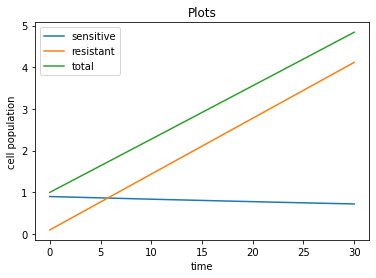

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math # just in case

# the differential equation with sat parameters

# diff. eq. for sensitive cells:
def dxdt(x):
    return -1*(0.001+0.01)*x

# diff. eq. for resistant cells
def dxRdt(x1,x2):
    return (0.001*x1)+(0.1*2)

# the parameters:
# {s, r, g }= {-0.01, 0.1, 0.001}
# {CS0, CR0} = {0.9,0.1}
h = 0.1
CS0 = 0.9  #sensitive cells
CR0 = 0.1  #resistant cells
s = -0.01
r =   0.1  #use the numbers from the paper
g = 0.001

#x1_diff = -1*(g-s)


#independent variable t (time in days for 30 days):
t = np.arange(0,30+h,h)
#t = np.arange(0,2+h,h)

# set the CS, CR, and CP
CS = np.zeros(len(t))
CR = np.zeros(len(t))
CP = np.zeros(len(t))

#initial values:
CS[0]= CS0
CR[0]= CR0
CP[0]= CS0 + CR0

## the First order ODE is time independent

#for the sensitive cell population: CS
for i in range(1,len(t)):
    K1 = h* dxdt(CS[i-1])
    K2 = h* (0.5*dxdt(CS[i-1]+0.5*K1))
    K3 = h* (0.5*dxdt(CS[i-1]+0.5*K2))
    K4 = h* dxdt(CS[i-1]+K3)
    CS[i] = CS[i-1] + (1/6)*(K1+(2*K2)+(2*K3)+K4)
    CS0 = CS
    
    
    #for the resistant cell population: CR
for i in range(1, len(t)):
    K1 = h* dxRdt(CS[i-1],CR[i-1])
    K2 = h* (0.5*dxRdt(CS[i-1],CR[i-1]+0.5*K1))
    K3 = h* (0.5*dxRdt(CS[i-1],CR[i-1]+0.5*K2))
    K4 = h* dxRdt(CS[i-1],CR[i-1]+K3)
    CR[i] = CR[i-1] + (1/6)*(K1+(2*K2)+(2*K3)+K4)
    CR0 = CR

#for the resistant cell population: CR
for i in range(1, len(t)):
    CP[i] = CS[i]+ CR[i]
# plot:
plt.title("Plots")
plt.xlabel("time")
plt.ylabel("cell population")
plt.plot(t,CS, \
        label = 'sensitive')
plt.plot(t,CR, \
        label = 'resistant')
plt.plot(t, CP, \
        label = 'total')
plt.legend()
plt.show()